# Letter Recognition
 Model Comparison

## Set Up

### Import Libraries

In [3]:
# image manipulation
import cv2

# data
from emnist import extract_training_samples,extract_test_samples

# visualisation
import matplotlib.pyplot as plt

# data manipulation
import pandas as pd
import numpy as np

# modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.config import run_functions_eagerly

### Useful functions

In [4]:
# from local image (png, jpg, ...) to data
def img_to_data(src,n):
    originalImage = cv2.imread(src)
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(grayImage, (n,n))
    rescaledImage = 16 - resizedImage*(16/255)
    return rescaledImage

# plot image
def show_char(d):
    plt.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# prediction as letter
alphabet = np.array(["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
def alph_res(pred):
    return (alphabet[pred == max(pred)])

# test model
def test_model(model,X_test,y_test):
    pred = model.predict(X_test)
    model.score(X=X_test,y = y_test)
    return(pred)

### Importing the Data (emnist)

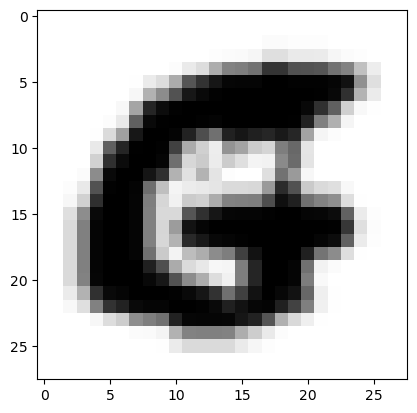

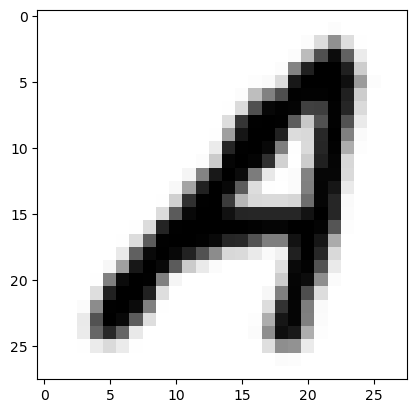

In [5]:
# data - letters
images, labels = extract_training_samples('letters')
t_images, t_labels = extract_test_samples('letters')

reshapedImages = images.reshape( (images.shape[0], 28*28))
t_reshapedImages = images.reshape( (images.shape[0], 28*28))

labels_binary = to_categorical(labels - 1)


show_char(images[1])
show_char(t_images[1])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    reshapedImages, 
    labels, 
    test_size=0.33, 
    random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83616, 784)
(83616,)
(41184, 784)
(41184,)


## Models

### Logistic Regression

In [9]:
# log_reg = LogisticRegression(max_iter=10000)
# log_reg.fit(X=X_train,y = y_train)
# log_reg.score(X=X_test,y = y_test)

### NN - Keras


In [12]:
# model - letters
n_cols = len(reshapedImages[1])

nn = Sequential()
nn.add(Dense(100, activation="relu", input_shape = (n_cols,))) 
nn.add(Dense(26,activation="softmax"))
nn.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

early_stopping_monitor = EarlyStopping(patience = 5)

run_functions_eagerly(False)
nn.fit(reshapedImages,
            labels_binary,
            epochs=20,
            validation_split=.2,
            callbacks=[early_stopping_monitor])

Epoch 1/20
3120/3120 [==============================] - 24s 7ms/step - loss: 3.4744 - accuracy: 0.2325 - val_loss: 2.2162 - val_accuracy: 0.3325
Epoch 2/20
3120/3120 [==============================] - 22s 7ms/step - loss: 1.9175 - accuracy: 0.4142 - val_loss: 1.6764 - val_accuracy: 0.4866
Epoch 3/20
3120/3120 [==============================] - 24s 8ms/step - loss: 1.5763 - accuracy: 0.5203 - val_loss: 1.5338 - val_accuracy: 0.5304
Epoch 4/20
3120/3120 [==============================] - 23s 7ms/step - loss: 1.4604 - accuracy: 0.5555 - val_loss: 1.4865 - val_accuracy: 0.5542
Epoch 5/20
3120/3120 [==============================] - 22s 7ms/step - loss: 1.3995 - accuracy: 0.5794 - val_loss: 1.4465 - val_accuracy: 0.5581
Epoch 6/20
3120/3120 [==============================] - 22s 7ms/step - loss: 1.3627 - accuracy: 0.5932 - val_loss: 1.3910 - val_accuracy: 0.5877
Epoch 7/20
3120/3120 [==============================] - 22s 7ms/step - loss: 1.3243 - accuracy: 0.6075 - val_loss: 1.4194 - val_ac

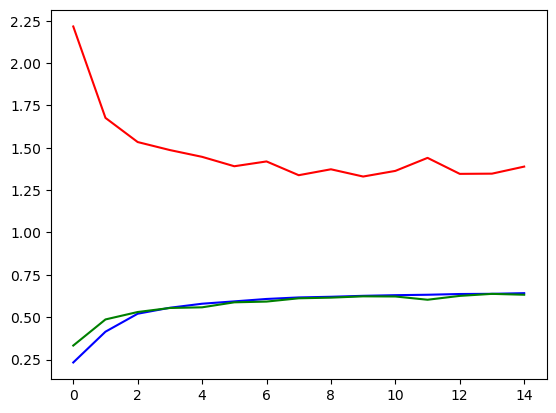

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 26)                2626      
                                                                 
Total params: 81,126
Trainable params: 81,126
Non-trainable params: 0
_________________________________________________________________


In [13]:
plt.plot(nn.history.history['val_loss'], 'r')
plt.plot(nn.history.history['accuracy'], 'b')
plt.plot(nn.history.history['val_accuracy'], 'g')
plt.show()
nn.summary()

In [20]:
np.max(reshapedImages)

255

In [15]:
nn.save('nn.h5')

In [16]:
!tensorflowjs_converter --input_format keras nn.h5 nn

3900/3900 [==============================] - 19s 4ms/step
['p']


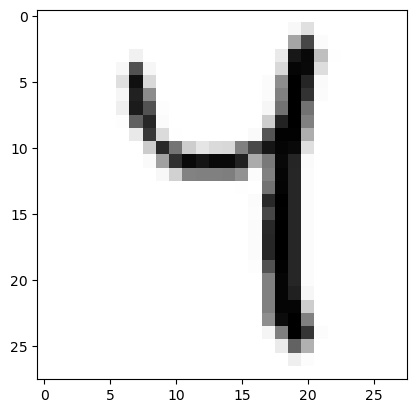

['s']


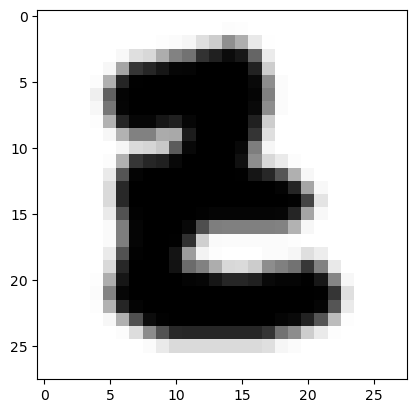

['k']


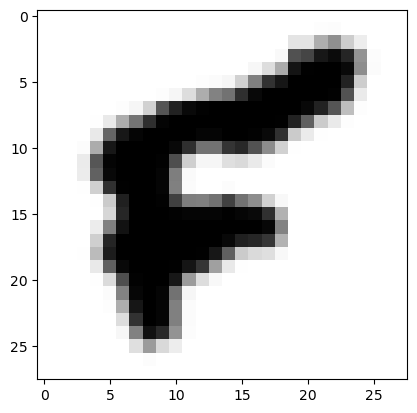

['x']


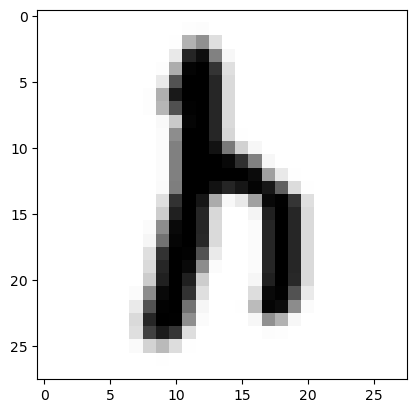

['t']


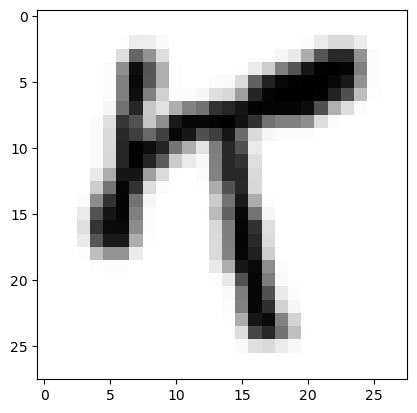

['o']


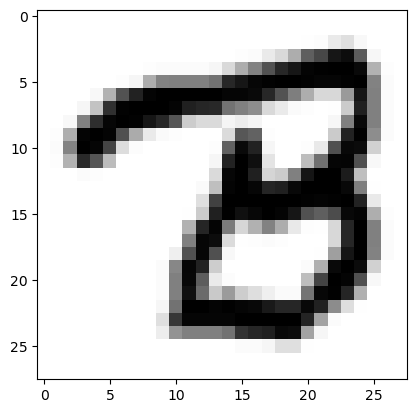

['y']


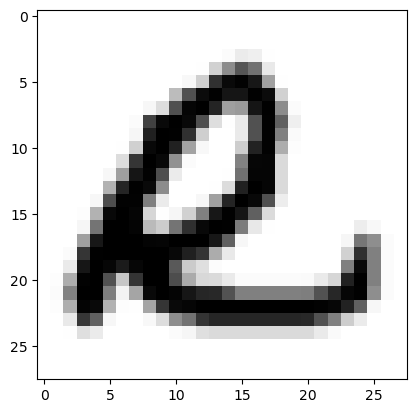

['q']


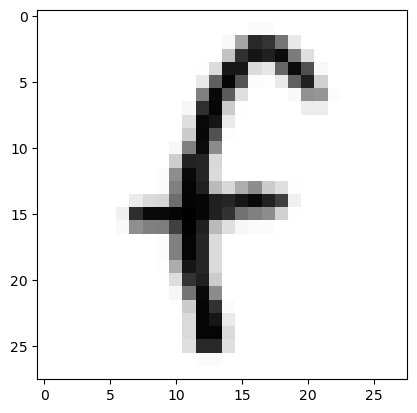

['a']


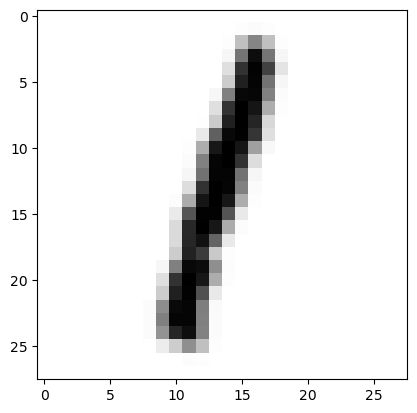

['r']


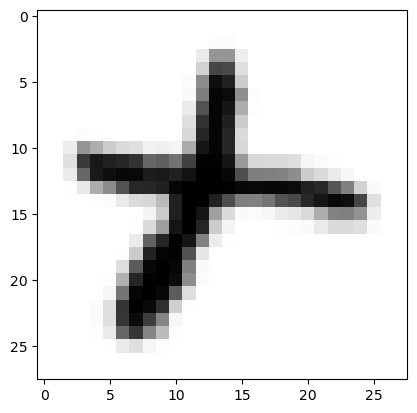

In [17]:
pred = nn.predict(t_reshapedImages)

for i in np.random.randint(low=1,high=20800,size=10):
    print(alph_res(pred[i]))
    show_char(t_images[i])

### Decision Tree

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=10)
dec_tree.fit(X=X_train,y = y_train)
dec_tree.score(X=X_test,y = y_test)

### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X=X_train,y = y_train)
rf.score(X=X_test,y = y_test)

### MLP - SKLearn

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

### CNN - Keras

In [30]:
cnn = Sequential()
cnn.add(Conv2D(50, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
cnn.add(MaxPooling2D((2, 2),padding='same'))
# cnn.add(Conv2D(10, kernel_size=(2, 2),activation='relu',padding='same'))
cnn.add(Flatten())
cnn.add(Dense(1000, activation='relu'))         
cnn.add(Dense(26,activation="softmax"))
cnn.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

conv_images = images.reshape(-1, 28,28, 1).astype('float32')

run_functions_eagerly(True)

cnn.fit(conv_images,
            labels_binary,
            epochs=100,
            validation_split=.2,
            callbacks=[early_stopping_monitor])


run_functions_eagerly(False)

c:\Users\claudio.paladini\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
3120/3120 [==============================] - 890s 284ms/step - loss: 1.2548 - accuracy: 0.8328 - val_loss: 0.3546 - val_accuracy: 0.8908
Epoch 2/100
3120/3120 [==============================] - 794s 255ms/step - loss: 0.2928 - accuracy: 0.9050 - val_loss: 0.3343 - val_accuracy: 0.8986
Epoch 3/100
3120/3120 [==============================] - 670s 215ms/step - loss: 0.2365 - accuracy: 0.9199 - val_loss: 0.3276 - val_accuracy: 0.9053
Epoch 4/100
3120/3120 [==============================] - 722s 231ms/step - loss: 0.1852 - accuracy: 0.9352 - val_loss: 0.3748 - val_accuracy: 0.9003
Epoch 5/100
3120/3120 [==============================] - 805s 258ms/step - loss: 0.1502 - accuracy: 0.9464 - val_loss: 0.4280 - val_accuracy: 0.9042
Epoch 6/100
3120/3120 [==============================] - 821s 263ms/step - loss: 0.1282 - accuracy: 0.9545 - val_loss: 0.5745 - val_accuracy: 0.8905
Epoch 7/100
3120/3120 [==============================] - 691s 221ms/step - loss: 0.1169 - accuracy: 0.9595

650/650 [==============================] - 10s 15ms/step
['y']


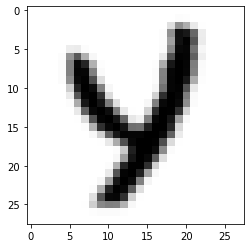

['c']


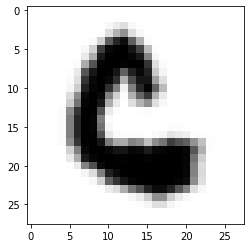

['p']


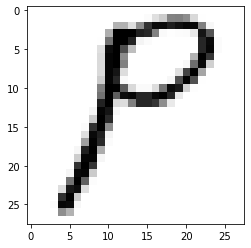

['p']


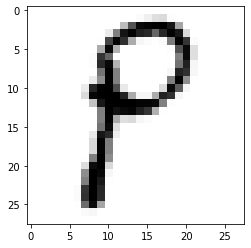

['c']


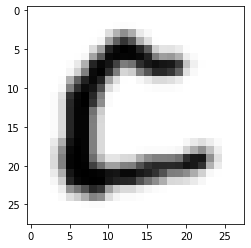

['l']


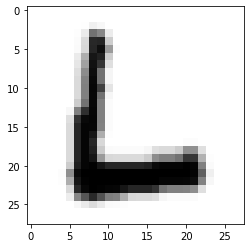

['j']


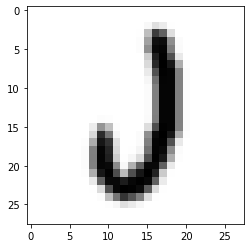

['v']


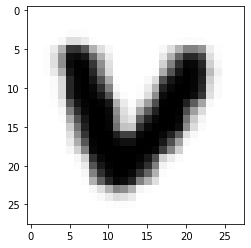

['x']


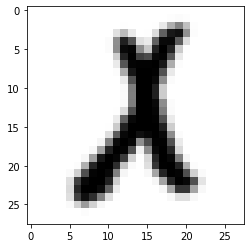

['q']


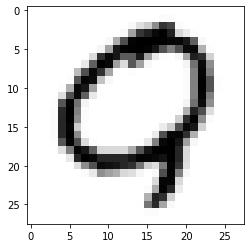

In [31]:
conv_test = t_images.reshape(-1, 28,28, 1).astype('float32')
conv_pred = cnn.predict(conv_test)

for i in np.random.randint(low=1,high=20800,size=10):
    print(alph_res(conv_pred[i]))
    show_char(t_images[i])

In [32]:
cnn.save('../static/models/conv_model.h5',overwrite=True)

## Tests

In [49]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import plotly.express as px

In [2]:
# load model
cnn = load_model("../static/models/conv_model.h5")

In [11]:
# generate predictions
conv_test = t_images.reshape(-1, 28,28, 1).astype('float32')
conv_pred = cnn.predict(conv_test)

y_true = [alphabet[i-1] for i in t_labels]
y_pred = [alph_res(x) for x in conv_pred]

650/650 [==============================] - 9s 14ms/step


<AxesSubplot:>

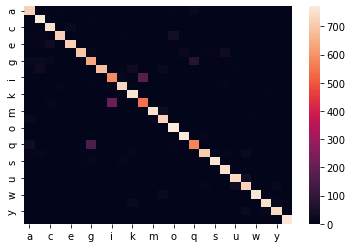

In [62]:
# confusion matrix
cm = confusion_matrix(
    y_pred=y_pred,
    y_true=y_true)

cm = pd.DataFrame(cm)
cm.columns = alphabet
cm.index = alphabet

sns.heatmap(cm)

In [63]:
px.scatter(
    data_frame = cm.reset_index().melt(id_vars="index"),
    x = 'index',
    y = 'variable',
    size = 'value'
)